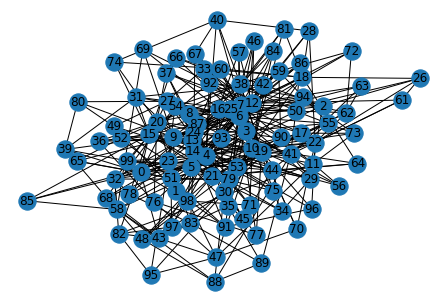

In [2]:
# import of necessary libraries for our program
import networkx as nx
import matplotlib.pyplot as plt
import random 
import numpy as np

# Creation of our scale-free network

n = 100 # number of nodes in our network
m = 4	  # number of initial links from a new node to the existing nodes

scale_free_graph = nx.barabasi_albert_graph(n,m)

# assigning the edge probabilities to the edges
for(a,b,c) in scale_free_graph.edges(data=True):
	c['weight'] = random.uniform(0,1)


# visualise the created network
nx.draw(scale_free_graph, with_labels=True) # to display node with numbers
plt.show()

In [13]:
# we define our own function to simulate the functioning of Independent Casacade Modelling

def IndependentCascadeModel_ScaleFree(scale_free_graph, number_runs, seed):
	spread = 0
	activated_graph = [seed]
	newly_activated_graph = [seed]

	for i in range(number_runs):
		# we traverse through each node
		# for every node getting newly activated, we try to find the neighbors of same that gets activate
		
		active_nodes = []

		for node in newly_activated_graph:
			neighbourhood = [nei for nei in scale_free_graph.neighbors(node)]
			good = []
			for neighbour_node in list(neighbourhood):
				temp = np.random.uniform(0,1) > scale_free_graph[node][neighbour_node]['weight']
				good.append(temp)
			active_nodes += list(np.extract(good, neighbourhood))

    # here we make sure that the nodes doesn't already exist

		newly_activated_graph = list(set(active_nodes) - set(activated_graph))
		activated_graph += newly_activated_graph

		if len(newly_activated_graph) == 0:
			return i
	
	return activated_graph
		

In [15]:
# here we call our function to pass our created network along with the initial seed node to be taken
# we also maintain a variable of the maximum number of nodes that are activated during an iteration

max_no_of_nodes = 0
for w in range(5):
  print(f"Here are the activated nodes when Seed Node is {w}:")
  active_nodes_graph = IndependentCascadeModel_ScaleFree(scale_free_graph, 5, w)
  print(active_nodes_graph)

  if type(active_nodes_graph) == list:
    u = len(active_nodes_graph)
    if(u > max_no_of_nodes):
      max_no_of_nodes = u
      max_seed_set = w


Here are the activated nodes when Seed Node is 0:
[0, 65, 4, 5, 41, 43, 87, 24, 2, 6, 7, 8, 9, 10, 12, 13, 15, 19, 21, 25, 26, 27, 29, 32, 35, 36, 37, 39, 40, 44, 45, 48, 54, 55, 58, 61, 68, 71, 72, 75, 85, 88, 89, 92, 1, 3, 11, 14, 16, 17, 18, 20, 22, 23, 28, 30, 31, 33, 34, 38, 42, 46, 47, 50, 53, 56, 57, 59, 60, 62, 63, 64, 66, 67, 69, 70, 73, 74, 77, 78, 79, 81, 84, 86, 91, 93, 94, 95, 98, 96, 99, 76, 49, 82, 83, 52, 80, 97, 51]
Here are the activated nodes when Seed Node is 1:
[1, 49, 4, 2, 3, 5, 7, 8, 10, 76, 80, 17, 20, 85, 24, 27, 29, 38, 40, 43, 45, 0, 6, 9, 11, 12, 13, 14, 15, 16, 18, 19, 21, 22, 23, 26, 28, 30, 32, 34, 35, 36, 37, 39, 41, 42, 46, 47, 48, 50, 52, 53, 58, 64, 67, 70, 71, 72, 75, 81, 82, 83, 84, 86, 91, 99, 25, 31, 33, 44, 51, 54, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 69, 73, 77, 78, 79, 87, 88, 89, 92, 94, 95, 96, 97, 98, 74, 68, 90]
Here are the activated nodes when Seed Node is 2:
[2, 42, 93, 31, 15, 32, 34, 6, 14, 20, 21, 56, 92, 1, 3, 4, 5, 7, 8, 9, 10, 

In [16]:
# here we print the maximum nuber of nodes that got activated and with which node as the Seed Set

print(f"Optimal Seed Set: {max_seed_set}")
print(f"Maximum Number of nodes getting activated with above seed set: {max_no_of_nodes}")

Optimal Seed Set: 0
Maximum Number of nodes getting activated with above seed set: 99
